**LOOK AT GUNNING FOGG INDEX**
# TEST REPORT: Bach's 20th Chorale (Ein Feste Burg)

As someone who knows nothing about music theory, I've been having to make some strong generalizations about why the AI generated music is "worse" or "not singable." From broadly throwing terms like "the chords are spaced incredibly far apart" to "the voice leading seems weird in the tenor line" or "there are way to many accidentals in the alto line." These would be fine in the context of my project as my project is already quite ambitious. But I'm not satisfied - it's vague and doesn't give incredibly concrete evidence of differences.

Enter `music21` - a coding package developed by members of the music department at MIT (who knew such a thing existed?!). `music21` has the ability to compute almost every possible scenario a first-year conservatory student would face in their music theory studies - identifying keys, chords and what their inversions are, identifying major/minor, and more. It was built using the Python programming language - one of (if not THE) easiest coding language to pick up and learn. Because of this, `music21` can land in the hands of musicologists to incorporate into their research. 

As a case study - suppose you are looking at a Renaissance SATB choral mass that is roughly 40 minutes in length. You have a prediction that every time the word "Domine" (Lord) is said, the pitch is much higher than the average pitch of the piece. How do you answer that question? You sit down with the whole score and read through the entire score (4 times at that!), marking every time the word Domine is said, recording the pitch, and seeing if on average the pitch is indeed higher. With `music21`, you can write very simple code in about 5-10 minutes to answer this question completely - that's way faster than reading through and marking every part by hand.

For my research, `music21` provides me the ability to accomplish a few things that give me the concrete evidence I'm looking for:

1. **Chord progressions:** `music21` will write out the chord progressions for any piece of music for me. As long as I save my digital sheet music in the `.musicxml` format, I can import the music into my code and write all the chord progressions. This lets me find out if the AI is making (or rather NOT making) certain chord progressions at pivotal moments in the song. A handy tool - especially since I've taken no music theory yet and don't know how to find chord progressions by hand (...yet).
2. **Graphing musical information:** `music21` can generate many different kinds of graphs for me. While I can generate something simple like piano rolls, I can also generate histograms that show me the pitch distribution of a piece, or the number of times certain rhythms occur. I can use these graphs to visually highlight differences between Bach and AI that will be helpful in my research.


In this report, I will show you some of the basic actions that I've figured out how to do using this library. Yes you are going to see code - oh dear scary! But that's ok - like I said `music21` was designed with musicians and musicologists in mind. Even if you don't know how to code, I believe that combined with my explanations you will be able to read the code and follow the logic and ultimately know what the code is trying to do. You'll also see the output of every piece of code that I write. Alright, let's get started.

## Importing Libraries and Loading my Music

In order to use `music21`, we have to bring it into our coding environment. We would like to include every possible music feature from this library, so we will write the following code to make this happen:

In [1]:
from music21 import *
import matplotlib.pyplot as plt
import numpy as np

The important line is the first 1, `from music21 import *`. The `*` character simply means we want every feature from the package we wish to import - and we never know what we may need! Lines 2 and 3 are unimportant for the purposes of this report - I'm simply adding them so that I can make my plots look better.

Next, we need the computer to be able to understand the sheet music we give it - we need to turn it into computer speak. Luckily, `music21` provides us with a `converter` that we can use to turn it into computer speak that we can run code on. Using the `parse()` function to parse through our sheet music, we read in the original Bach score and the 3 AI scores with the following code:

In [2]:
original = converter.parse('ai-music/Chorale20/Chorale20_Original.musicxml')
deepbach1 = converter.parse('ai-music/Chorale20/Chorale20_DeepBach1.musicxml')
deepbach2 = converter.parse('ai-music/Chorale20/Chorale20_DeepBach2.musicxml')
deepbach3 = converter.parse('ai-music/Chorale20/Chorale20_DeepBach3.musicxml')

Even though we turned our music into computer speak, we can still see the contents of the music by using the `show()` function. This will output an image of the score that we called `show()` on. For example, here is the score for the original 20th chorale:

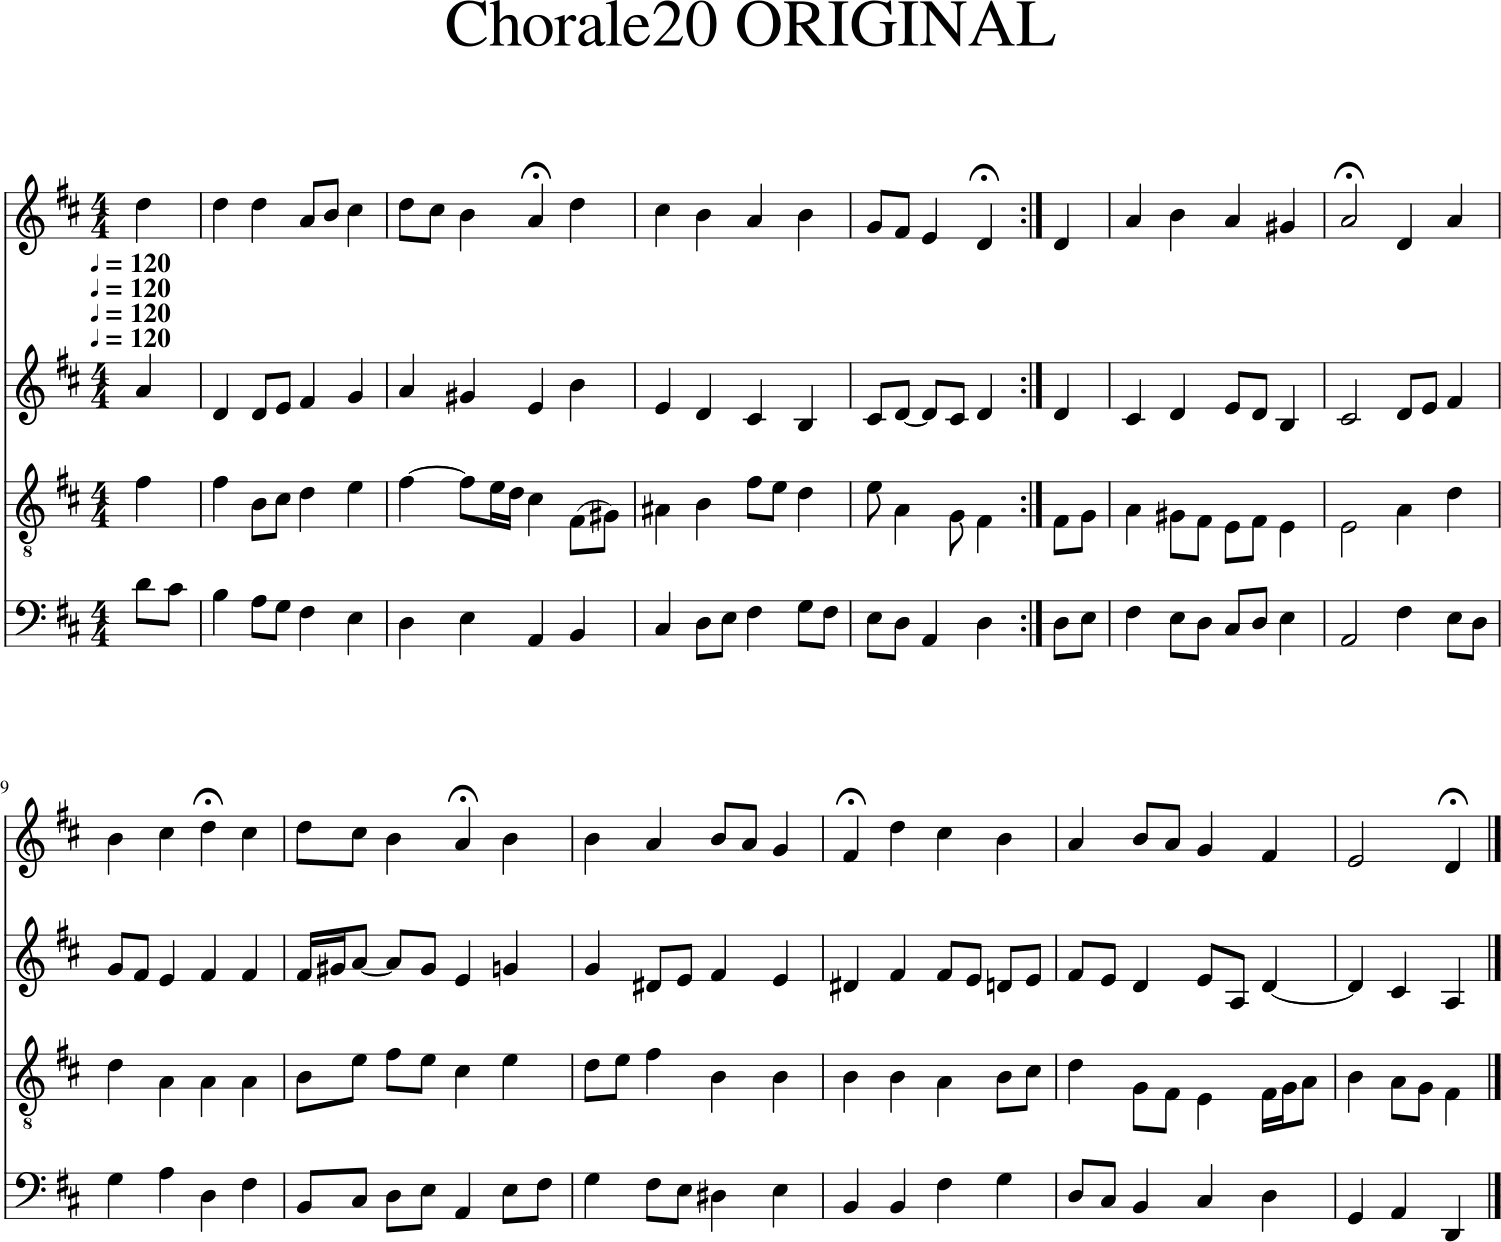

In [3]:
original.show()

We can also see the scores for all the AI generated music using the line above, just replacing `original` with each of the different `deepbach` variables:

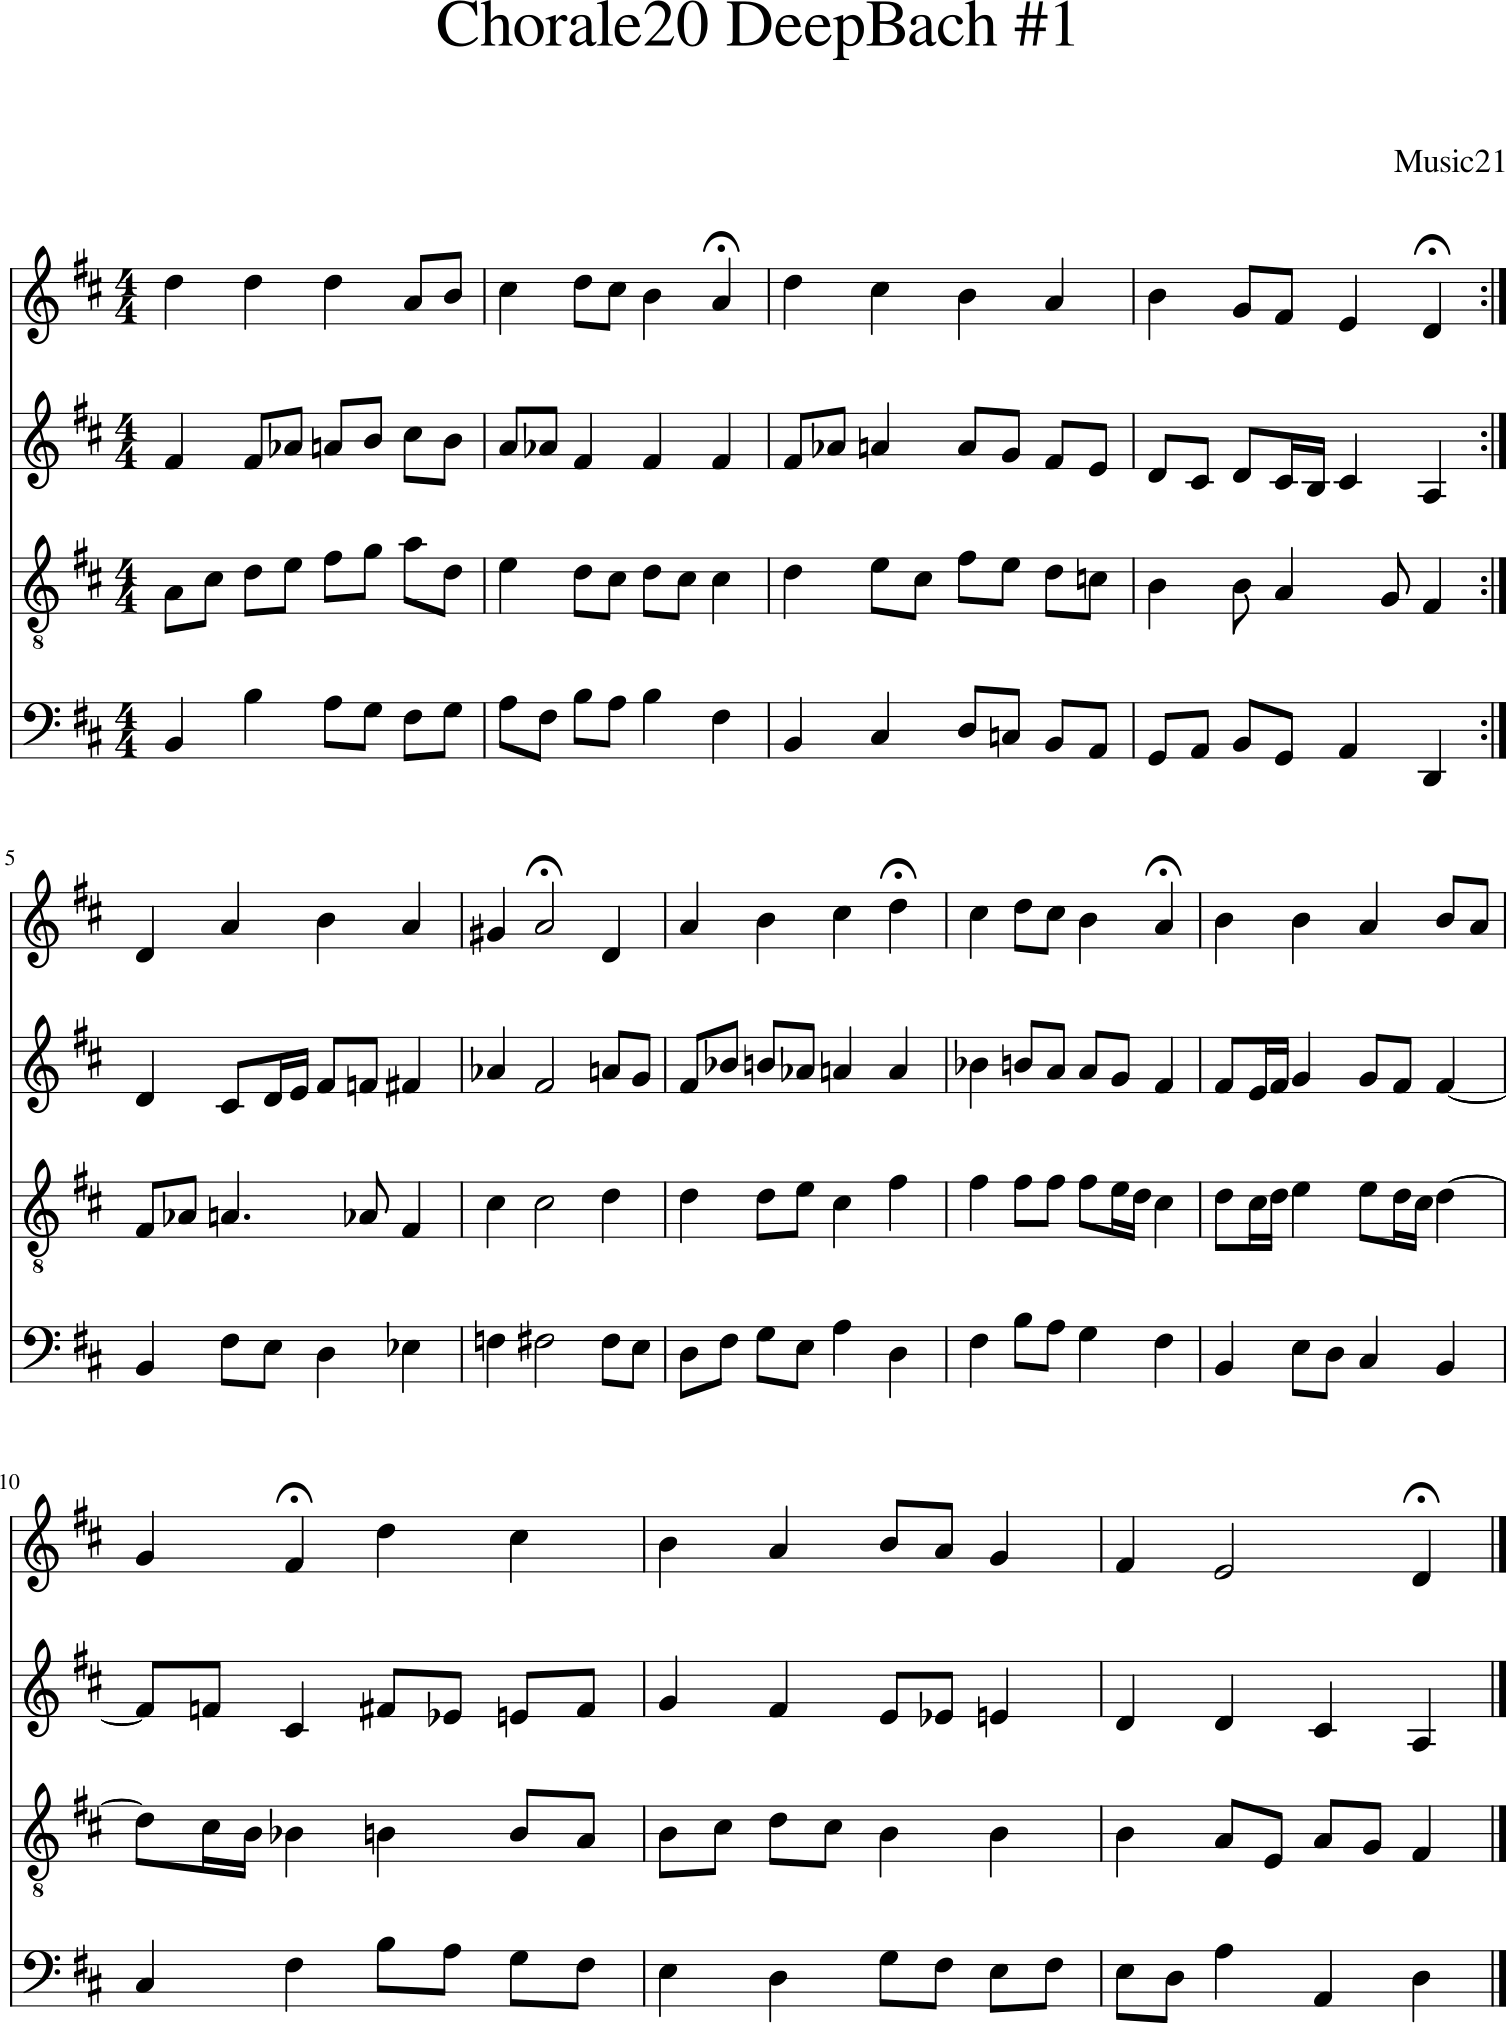

In [4]:
deepbach1.show()

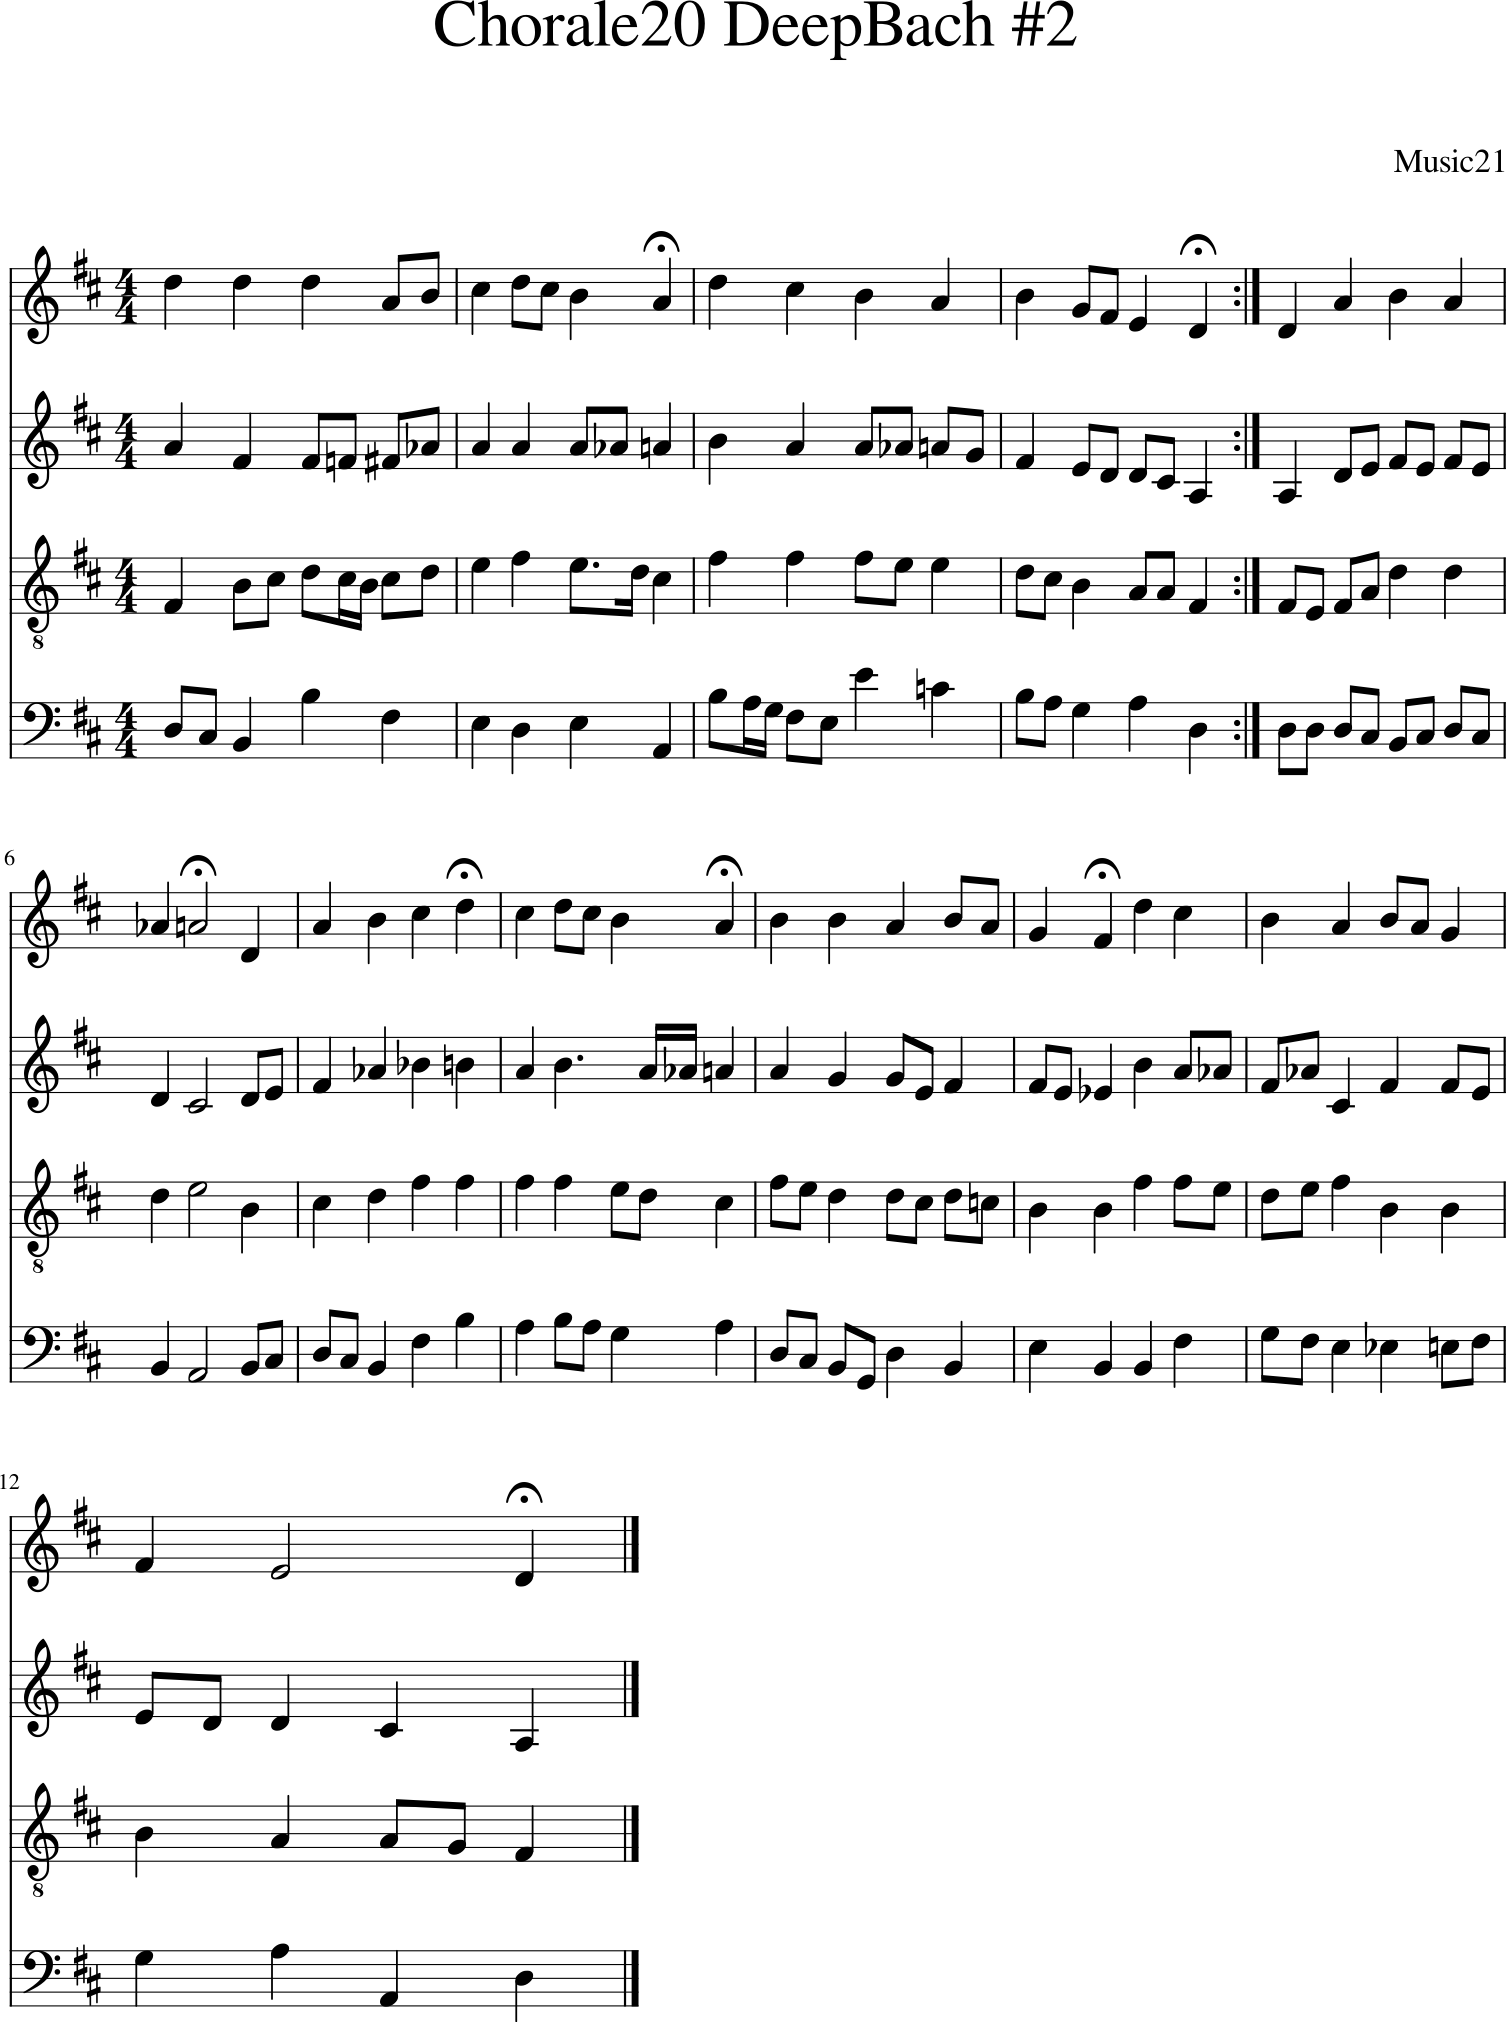

In [5]:
deepbach2.show()

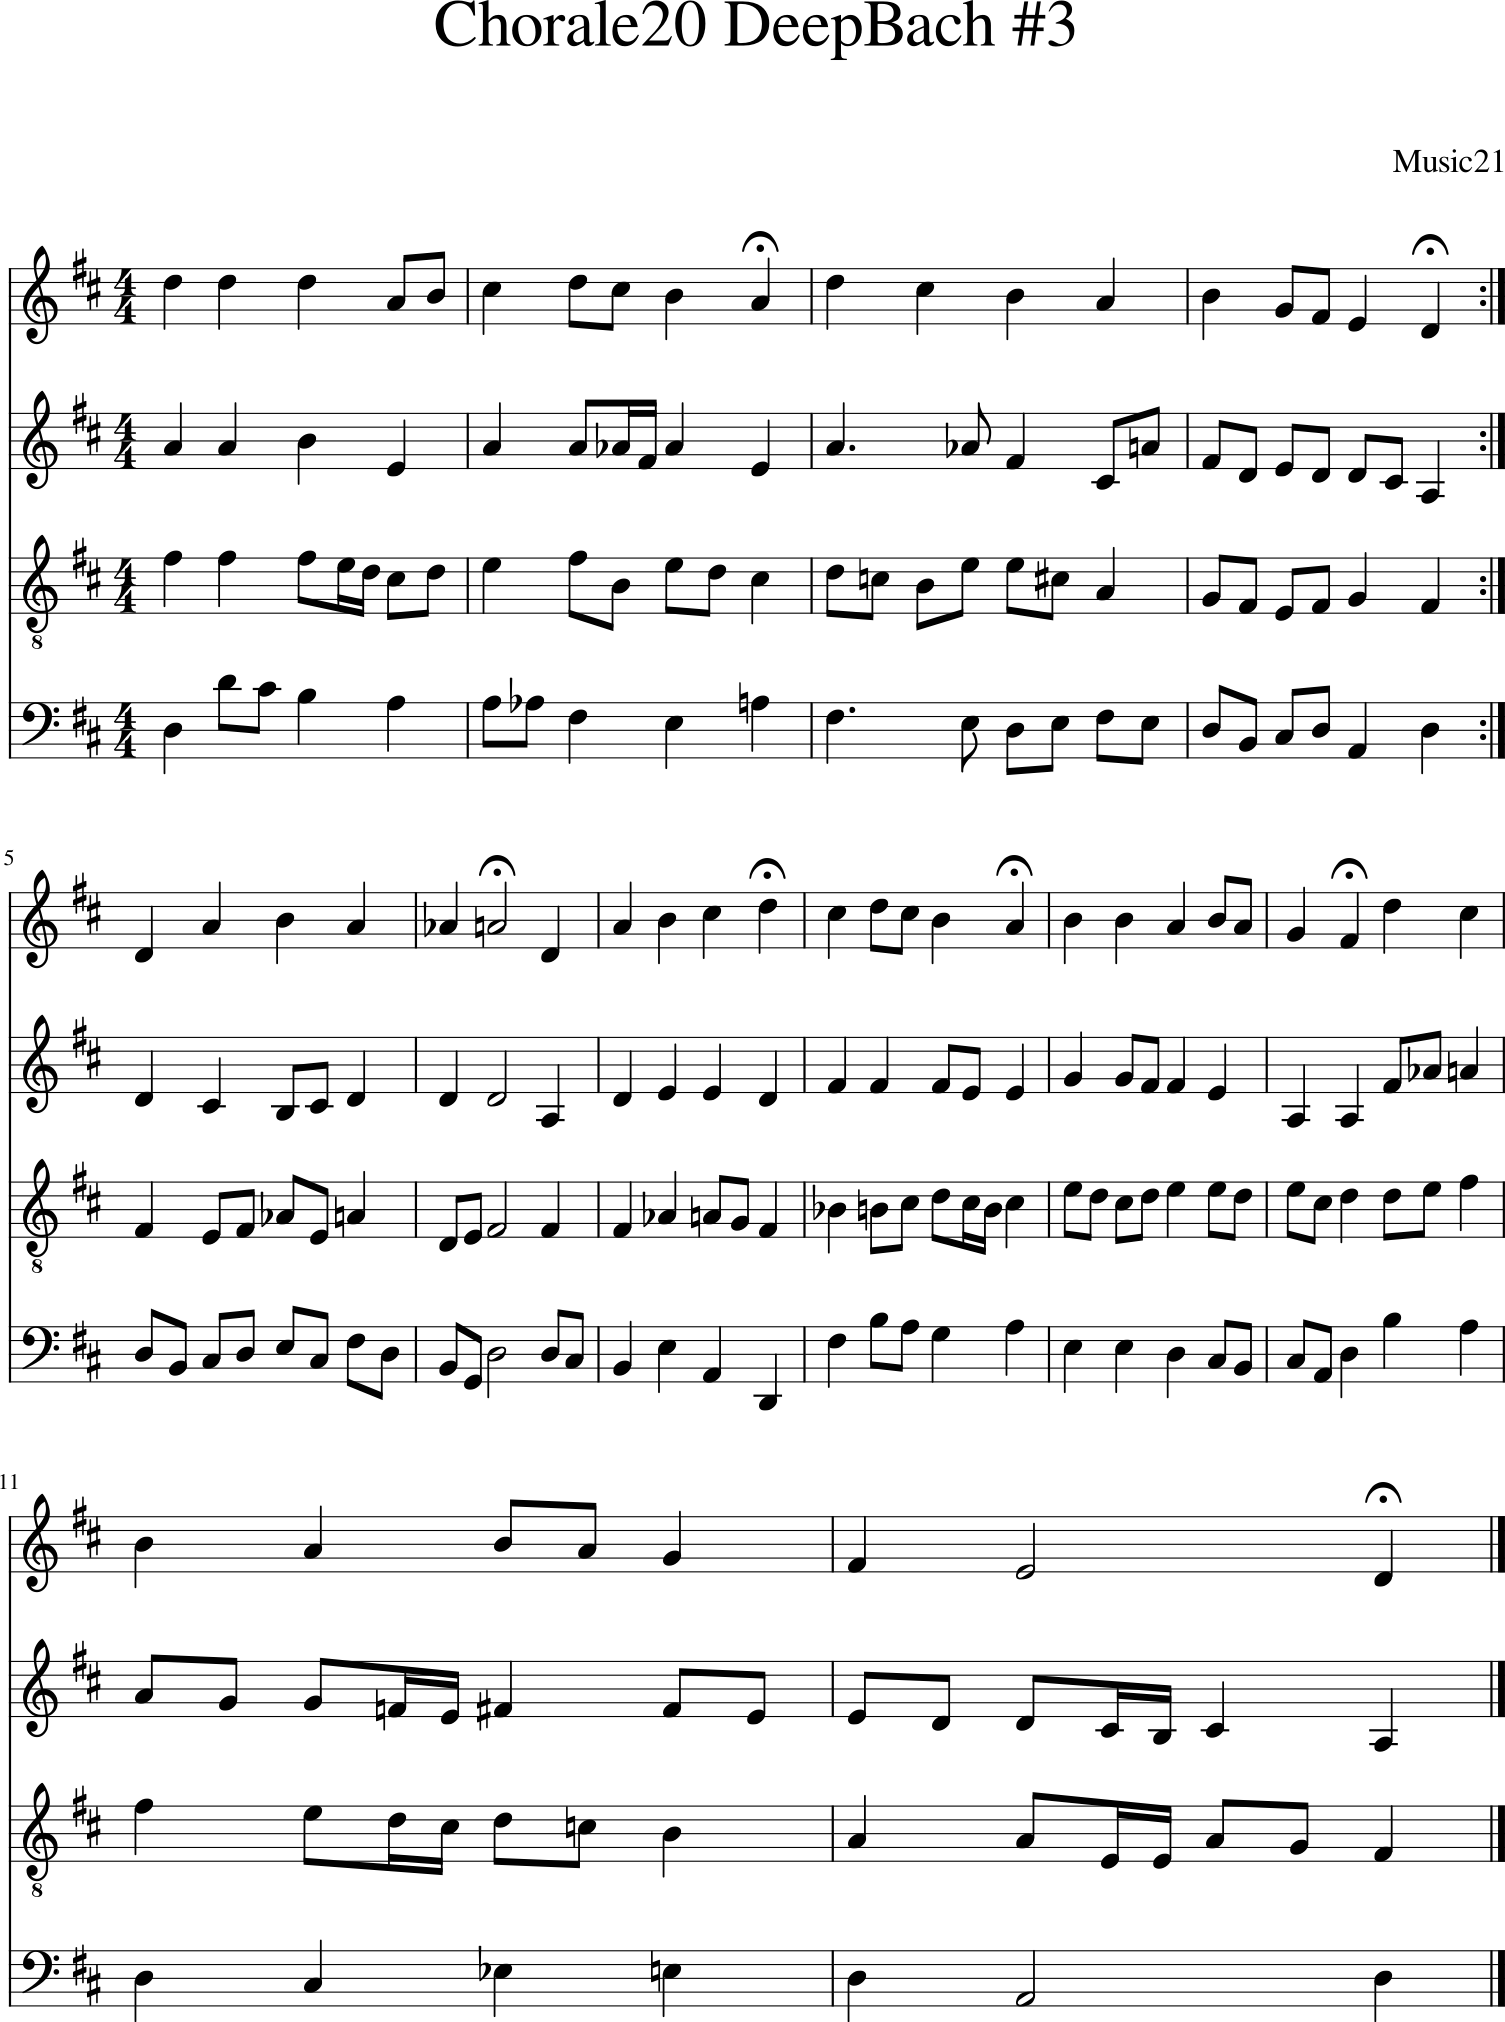

In [6]:
deepbach3.show()

## Graphs for Comparison

Since one of the features is to generate graphs, we can generate some graphs so that we can help visualize the differences between the AI generated chorales and the Bach chorale.

Let's start by looking generally at the piece - a histogram on the number of occurrences of each pitch. 

When you plot music information from a song, we can use the `plot()` function. Just doing a `plot()` function creates a piano roll:

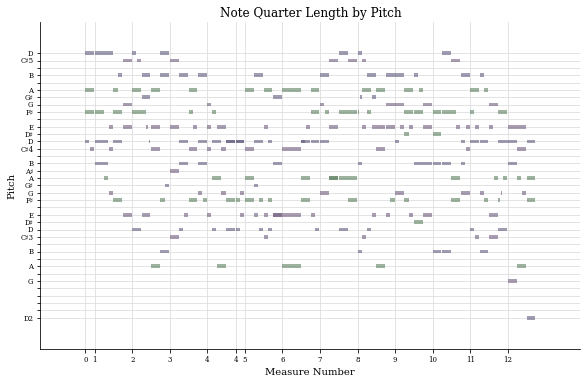

In [7]:
original.plot()

But that's incredibly boring and doesn't really give us much information. Thankfully, we can put the kind of plot that we want inside the `()` for the `plot()` function to generate different kinds of plots. Additionally, we can pass other values inside the `()` to change different parts of the graph, like the axis labels, the title of the graph, and the musical elements that you wish to plot on that graph.

The first set of graphs I feel would be interesting is to plot a histogram showing the number of occurrences of each pitch in a given chorale. Here is that graph for Chorale #20:

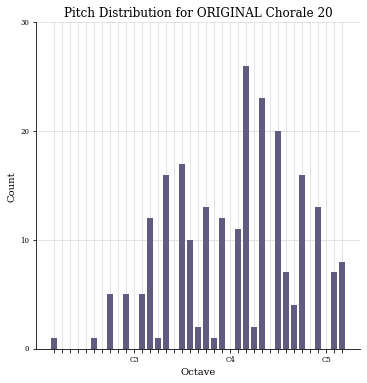

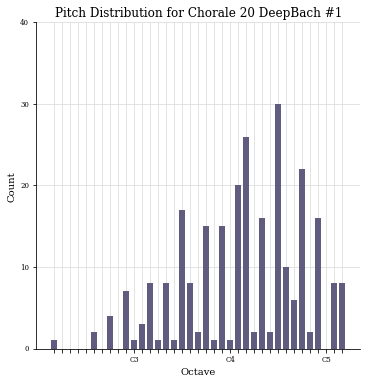

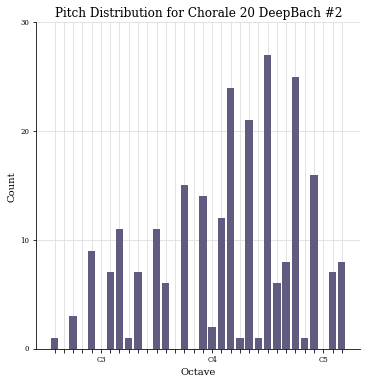

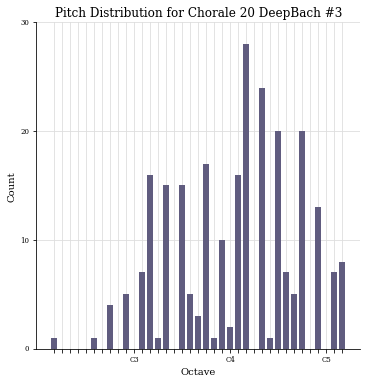

In [8]:
original.plot('histogram', 'octave', xHideUnused=False, yAxisLabel='Number of Pitches', title='Pitch Distribution for ORIGINAL Chorale 20')
# plot_ai_models(models=[deepbach1, deepbach2, deepbach3], type='histogram', feature='octave', title='Pitch Duration for Chorale 20 DeepBach #', yAxisLabel='Number of Pitches')

deepbach1.plot('histogram', 'octave', xHideUnused=False, yAxisLabel='Number of Pitches', title='Pitch Distribution for Chorale 20 DeepBach #1', color='red')
deepbach2.plot('histogram', 'octave', xHideUnused=False, yAxisLabel='Number of Pitches', title='Pitch Distribution for Chorale 20 DeepBach #2', color='red')
deepbach3.plot('histogram', 'octave', xHideUnused=False, yAxisLabel='Number of Pitches', title='Pitch Distribution for Chorale 20 DeepBach #3', color='red')

plt.show()

What do we learn from these graphs above? First, we can compare the distribution of notes between Bach and AI. We see that the Bach composition seems to be bimodal, with a smaller clump of common notes below middle C and a large clump of notes that are above middle C. This is not characteristic of DeepBach #1 which seems to simply just have a right skew. DeepBach #2 seems to have a more even distribution of pitches than the original Bach score. DeepBach #3 interestingly has a somewhat similar distribution to the original, with maybe slightly more balanced distribution of pitches than the original.

Another helpful graph is a histogram of RHYTHM occurrences. To do this, we plot the duration of notes on the x-axis and how many times that duration occurs in the y-axis. The graphs for the original and all 3 AI generations are as follows:

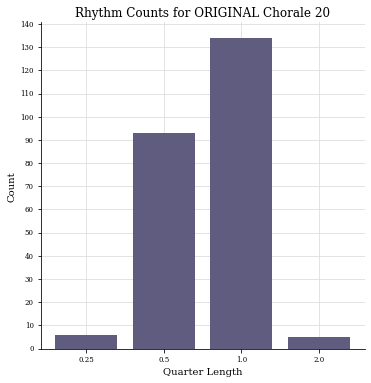

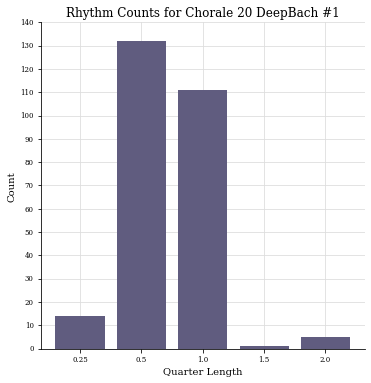

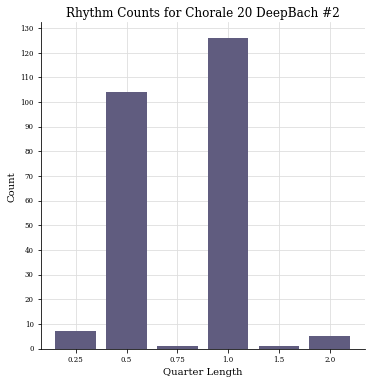

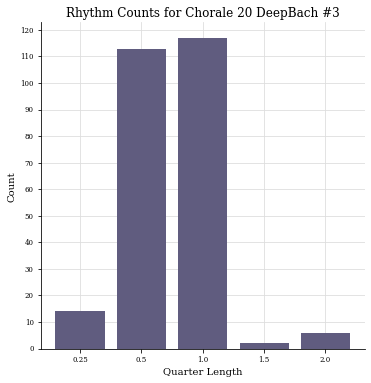

In [9]:
original.plot('histogram', 'duration', xHideUnused=False, yAxisLabel='Number of Pitches', title='Rhythm Counts for ORIGINAL Chorale 20')
deepbach1.plot('histogram', 'duration', xHideUnused=False, yAxisLabel='Number of Pitches', title='Rhythm Counts for Chorale 20 DeepBach #1')
deepbach2.plot('histogram', 'duration', xHideUnused=False, yAxisLabel='Number of Pitches', title='Rhythm Counts for Chorale 20 DeepBach #2')
deepbach3.plot('histogram', 'duration', xHideUnused=False, yAxisLabel='Number of Pitches', title='Rhythm Counts for Chorale 20 DeepBach #3')

Here we notice that the original score has mostly quarter and eighth rhythms, but not many of other kinds. However, our theory that AI tries to "overcompensate" Bach can be seen numerically in these graphs. DeepBach #1 has far more eighth notes than quarter notes. DeepBach #3 has a balance of eighth and quarter notes (still not accurate to the original composition), and while DeepBach #2 seems to have a similar distribution, do not be fooled that DeepBach #2 has slightly more occurrances of eighth notes than Bach.

There are many other graphs that we can generate and find useful. One that I don't see a particular reason to generate but I just like looking at is 3D bar graphs. We can generate a 3D bar graph to count the number of occurrences of certain pitches for certain durations using this kind of a graph:

/home/tbushnell/miniconda3/envs/deepbach_pytorch/lib/python3.6/site-packages/music21/graph/primitives.py:437: UserWarning: FixedFormatter should only be used together with FixedLocator
  family=self.fontFamily)


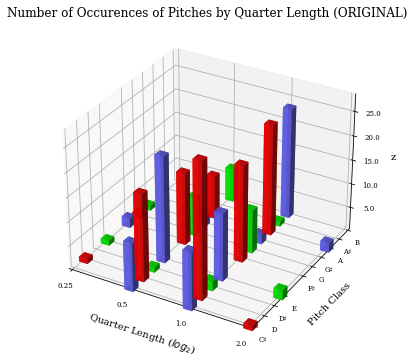

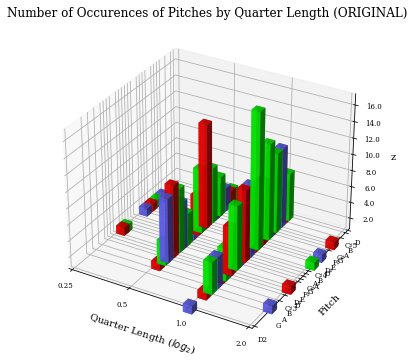

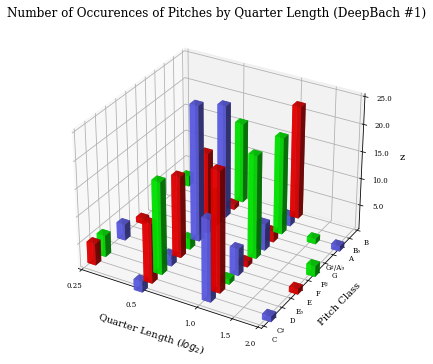

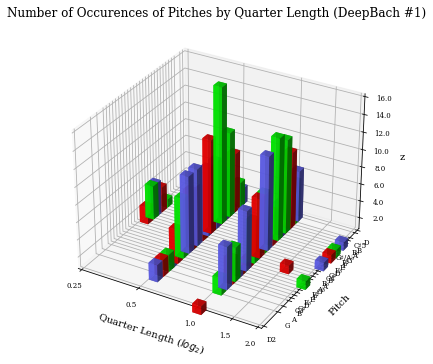

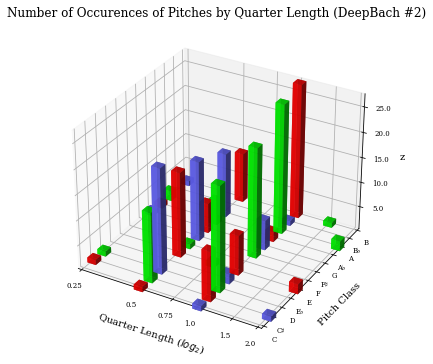

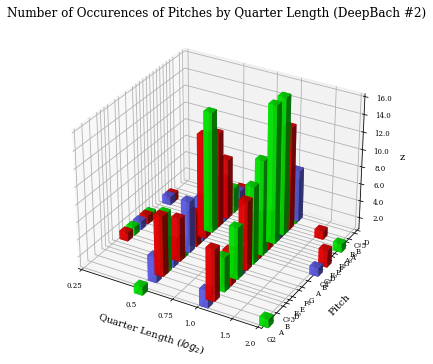

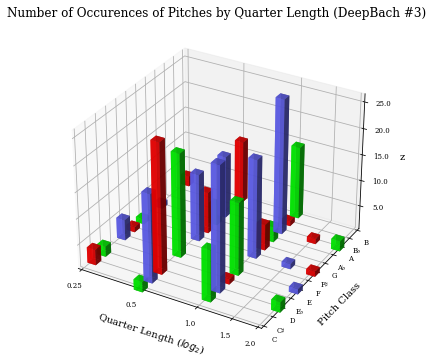

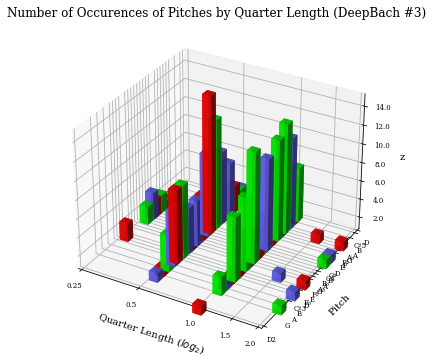

In [10]:
original.plot('3dbars', title='Number of Occurences of Pitches by Quarter Length (ORIGINAL)')
deepbach1.plot('3dbars', title='Number of Occurences of Pitches by Quarter Length (DeepBach #1)')
deepbach2.plot('3dbars', title='Number of Occurences of Pitches by Quarter Length (DeepBach #2)')
deepbach3.plot('3dbars', title='Number of Occurences of Pitches by Quarter Length (DeepBach #3)')

## Generating Chord Progressions

This is the part that I find completely fascinating - and also really helpful with my research. Throughout my readings, I have found that Bach likes to use - or rather *NOT* use - certain cadences and chords at certain moments in songs. However, since I have not taken any music theory, I don't know how to analyze the chord progressions. Spoiler - this programming package does that for me!

What I can now do is write code to generate my own score. This score will contain 4 lines, similar to an SATB score - except those 4 lines will be the compressed chords of each chorale. 

`music21` provides a way to convert a score into just chords on a single part using the `chordify()` function. Here are just the chords for the original Bach score:

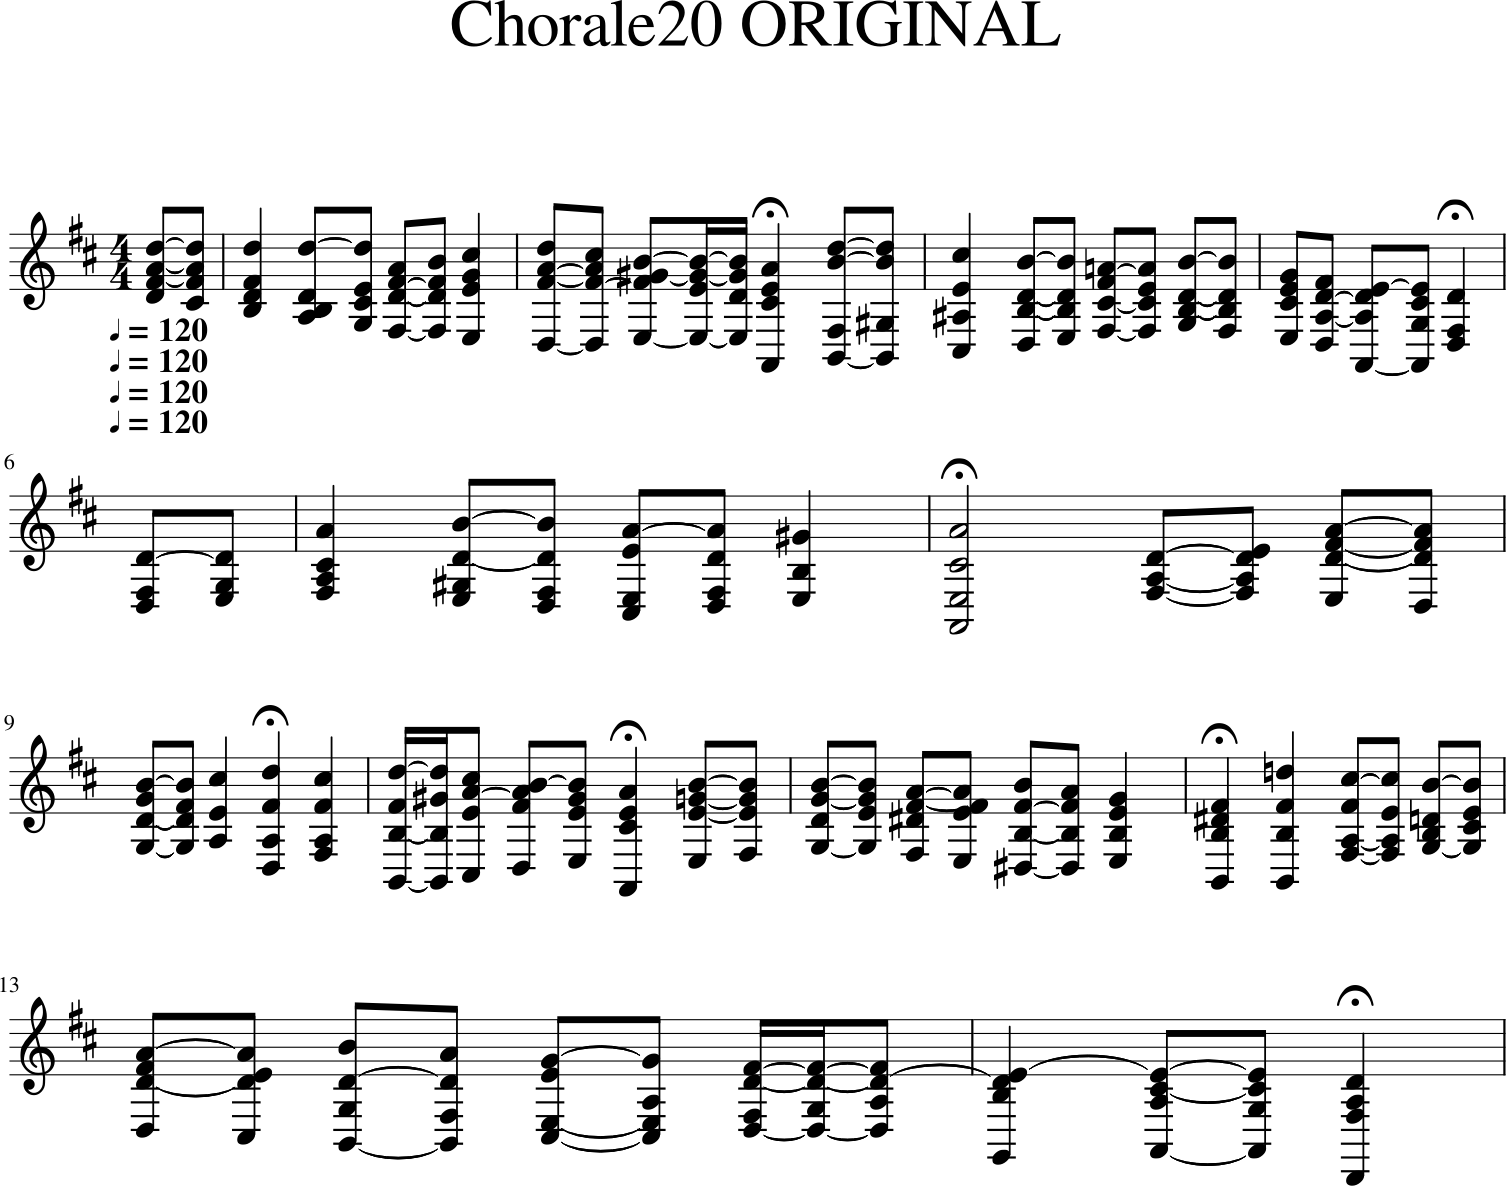

In [11]:
chords = original.chordify()
chords.show()

Nice! But it's really hard to read. Thankfully we can create closed positions of chords using the `closedPosition()` function, and we can additionally specify the octave we want to force the chord into by putting that octave inside `()`. Let's put all the chords into the 4th octave so they sit nicely in the treble clef.

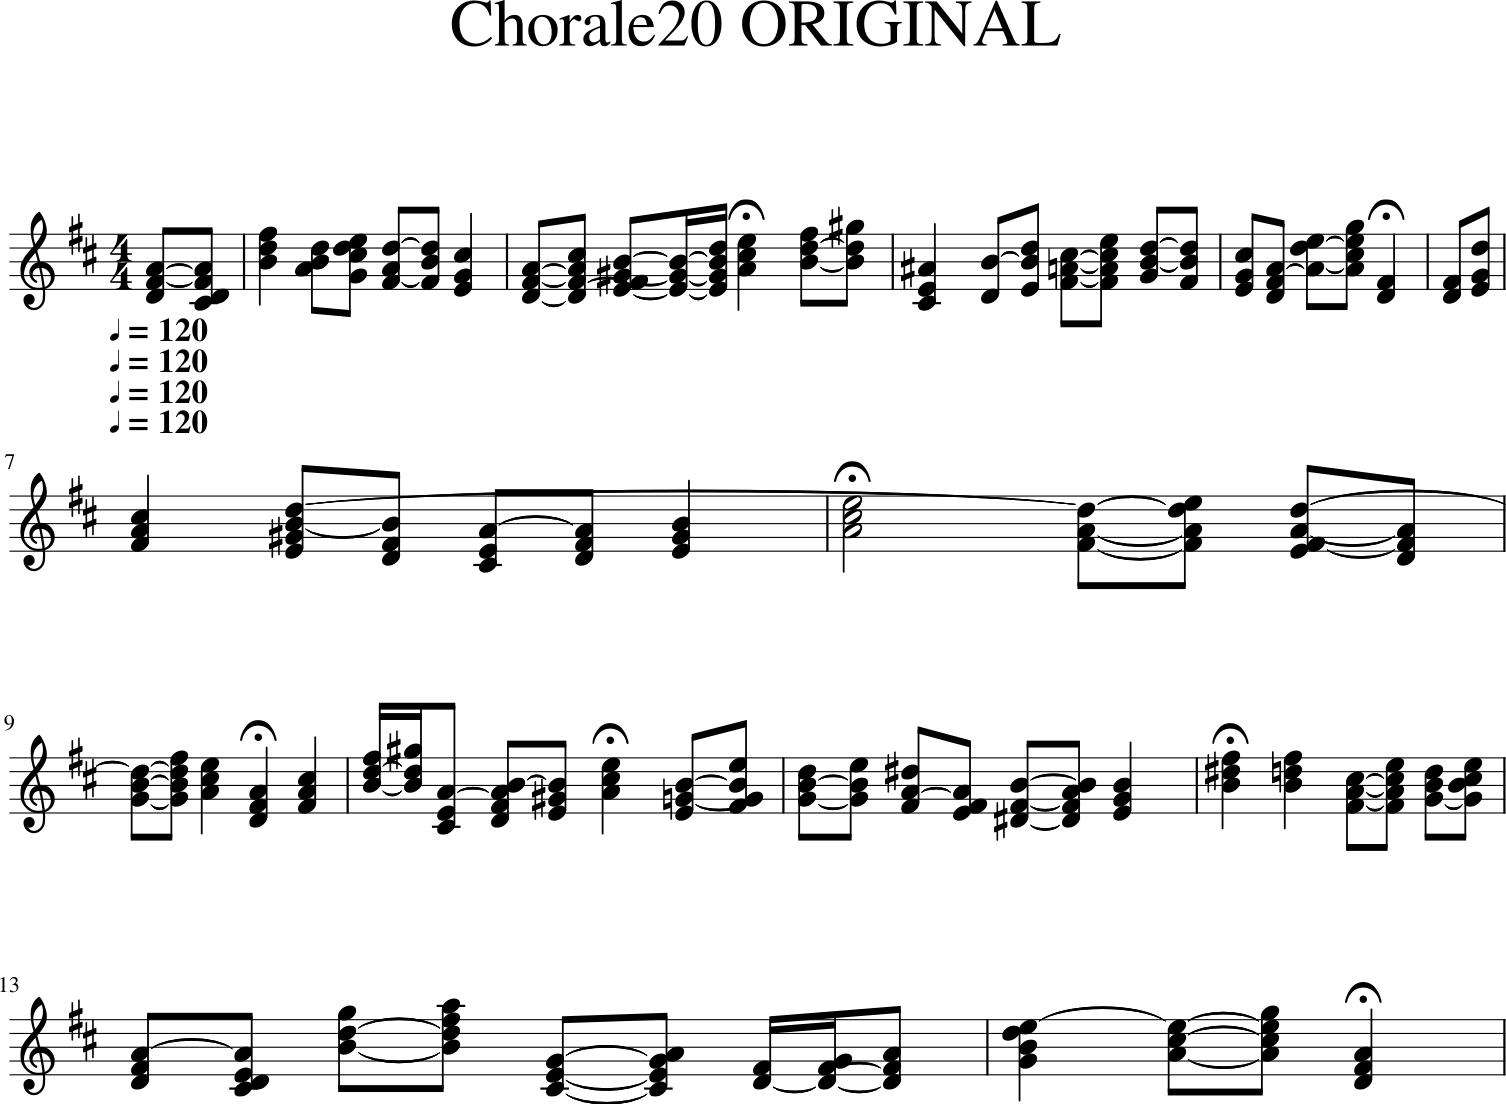

In [15]:
for c in chords.recurse().getElementsByClass(chord.Chord):
    c.closedPosition(forceOctave=4, inPlace=True)
chords.show()

Don't worry, that code is not as complicated as it looks! I'll break it down for you:

* `for c in ...`: this lets us step through our score looking at every single chord in a chorale. I'm calling each individual chord c because we already have something in our codebase called `chord` (it's part of the `music21` library telling us what defines a musical chord - we don't want to lose that information)
* `recurse()` helps step us through our entire score
* `getElementsByClass()` is needed so that `recurse()` doesn't have to look at every possible component of a score. Since we only want to look at chords, we put `chord.Chord` in the `()` to tell the computer that we just want to look at the chords in the chorale.
* Then we indent the code and every line we write in the indent will run over and over for every single chord in the entire chorale, allowing us to put every chord in closed position!

The chord progression above are definitely more readable, so the final step is to add the chord progressions. Using the similar `for c in ...` structure, we can loop through every chord, and write the roman numeral chord as the lyric for that line. Here's the code for that:

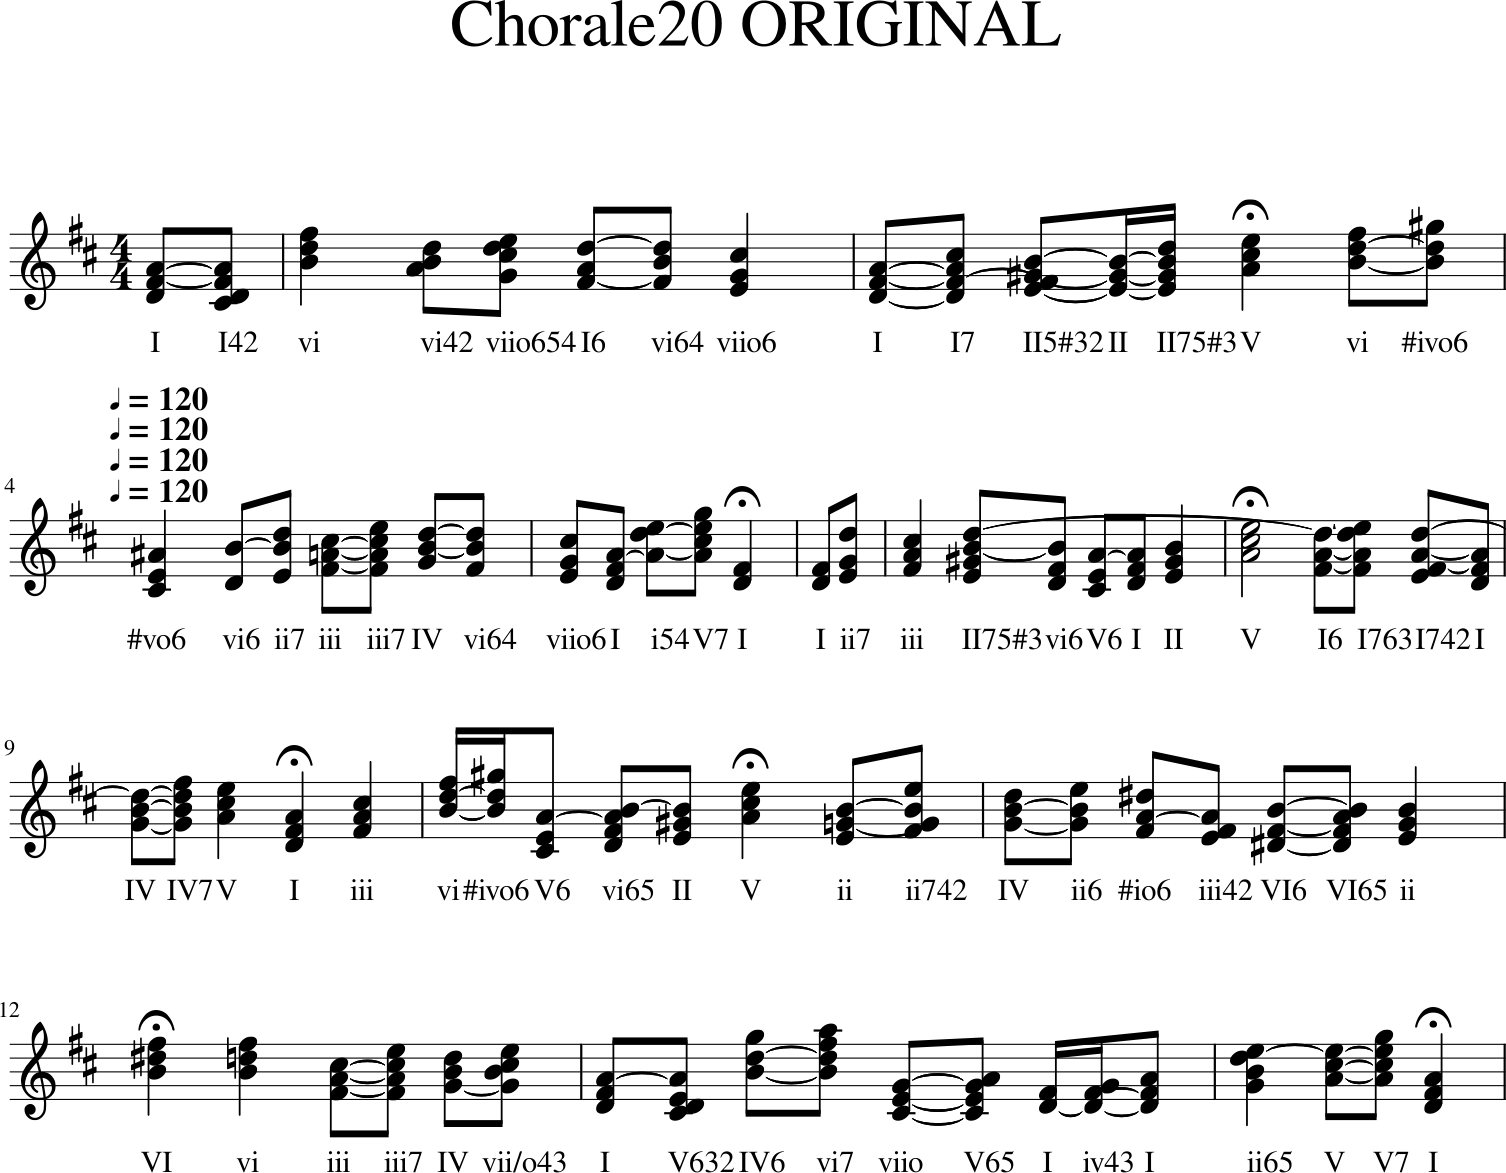

In [16]:
for c in chords.recurse().getElementsByClass(chord.Chord):
    rn = roman.romanNumeralFromChord(c, key.Key('D'))
    c.addLyric(str(rn.figure))
chords.show()

Note that when converting to a roman numeral chord we have to explicitly specify the key. Here I'm hard-coding this as D major (as this is the key of the song), but there is a way to get the key of a song via code. I'm choosing not to do this for reasons I will explain later. Either way - we have chord progressions!

The final thing to do is combine all that we have learned to create a score with each line being the chord progressions for each chorale. To help with this, I will define a function using all the code that we have written in this section:

In [12]:
def get_chord_progressions(score):
    chords = score.chordify()
    
    for c in chords.recurse().getElementsByClass(chord.Chord):
        c.closedPosition(forceOctave=4, inPlace=True)
        rn = roman.romanNumeralFromChord(c, key.Key('D'))
        c.addLyric(str(rn.figure))
    
    return chords

The above function generates the chord progressions with the roman numerals for any score we give it. Now we just have to create the final score with teh 4 lines, as seen below:

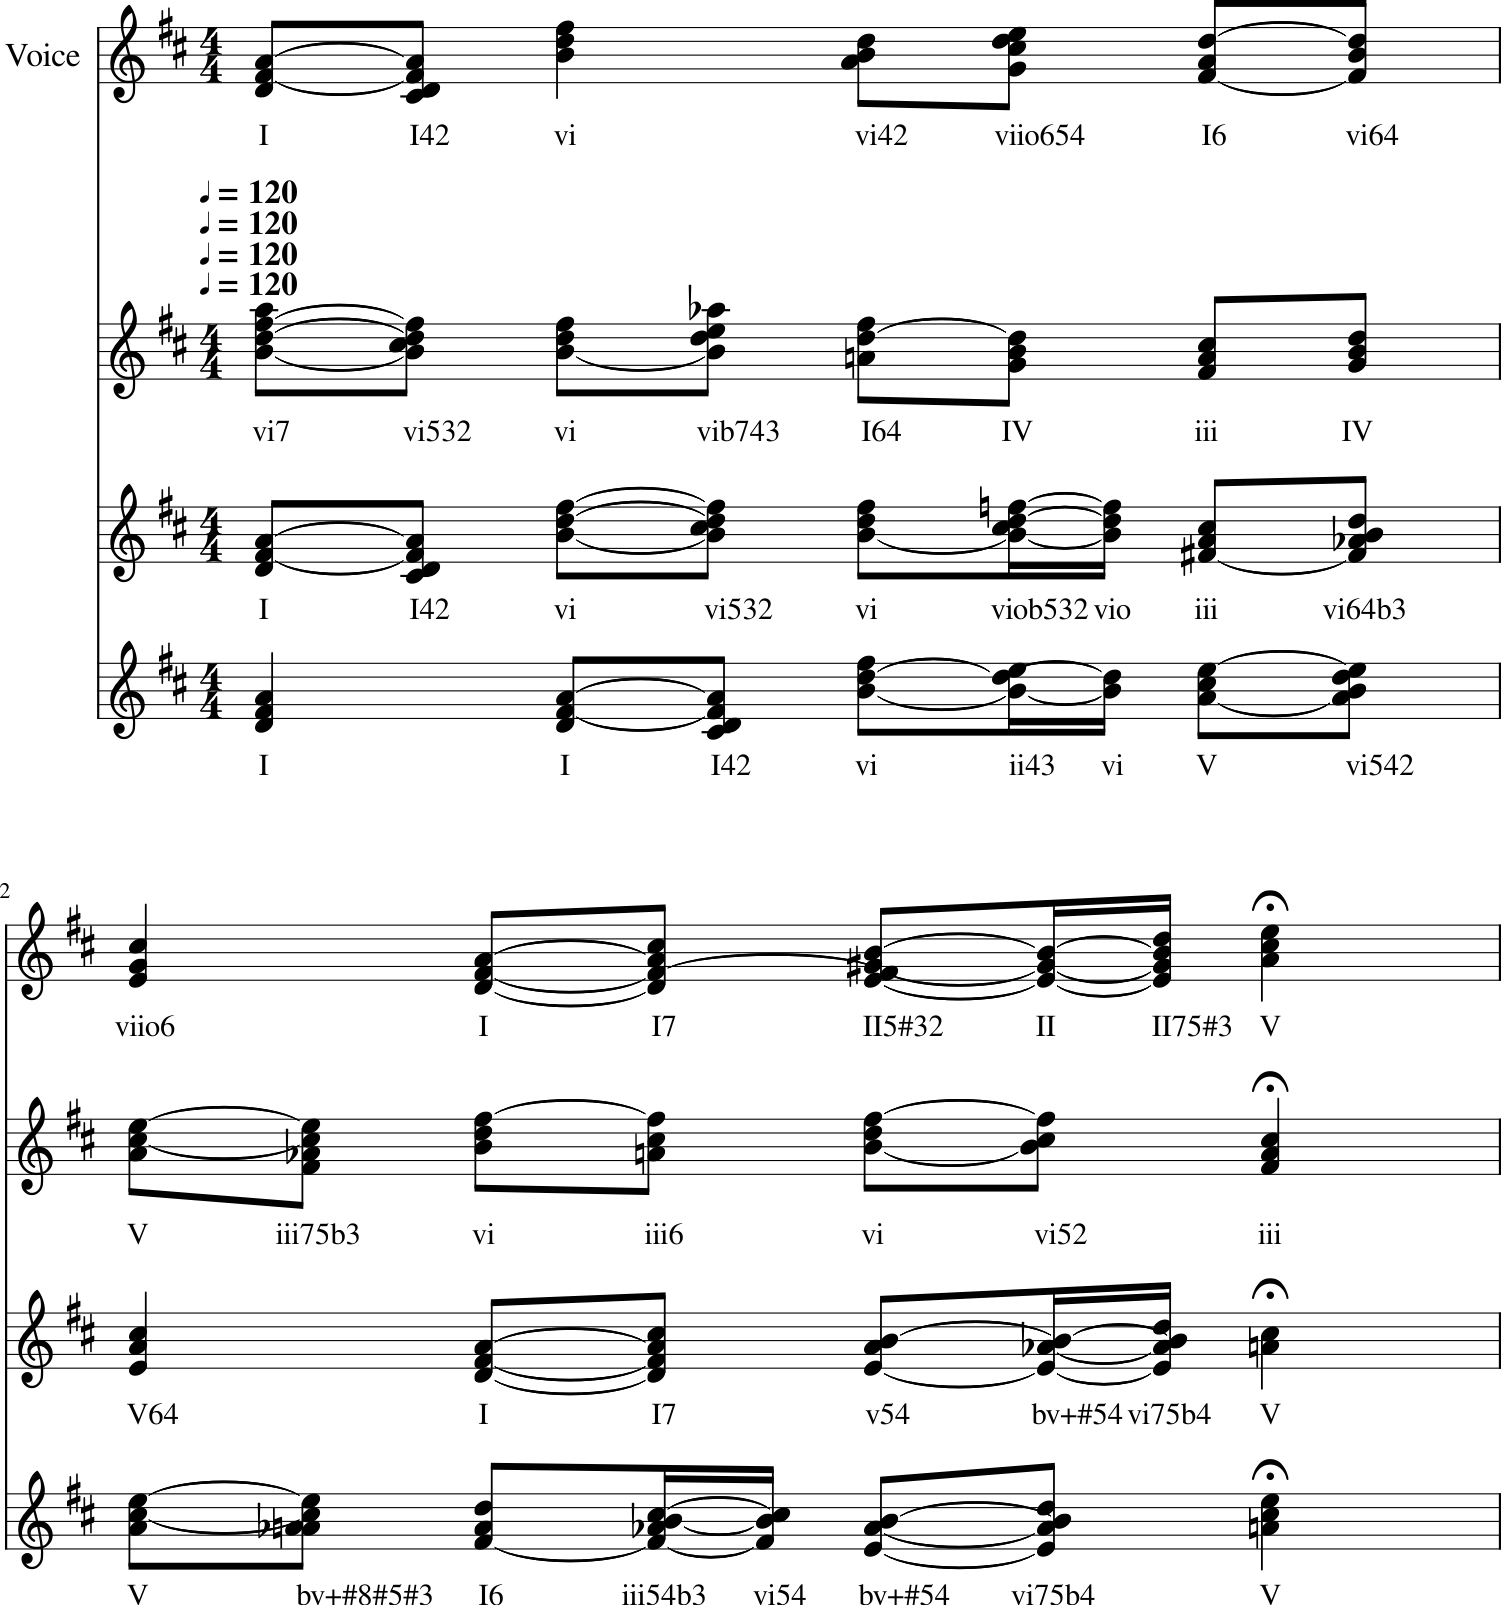

In [13]:
chorale20 = stream.Score()

original_part = stream.Part(id='Original')
original_part.insert(get_chord_progressions(original))

deepbach1_part = stream.Part(id='DeepBach #1')
deepbach1_part.insert(get_chord_progressions(deepbach1))

deepbach2_part = stream.Part(id='DeepBach #2')
deepbach2_part.insert(get_chord_progressions(deepbach2))

deepbach3_part = stream.Part(id='DeepBach #3')
deepbach3_part.insert(get_chord_progressions(deepbach3))

chorale20.insert(0, original_part)
chorale20.insert(0, deepbach1_part)
chorale20.insert(0, deepbach2_part)
chorale20.insert(0, deepbach3_part)

chorale20.show()

Hooray! Now I can compare chord progressions between pieces. 

Before I end of this section, I should note some of the potential problems that come up when I do this computation:

1. **it's generating some WEIRD chord progressions.** I'm no music theorist, but there are some chord progressions that don't make sense. However, all these nonsensical chord progressions are on off-beats - every chord that is on the beat is accurate to work that I have seen other music theory professors do online (see [here](https://www.people.vcu.edu/~bhammel/theory/homework/chorale/bach_020.html) for what I was looking at). As such, I need to figure out how I can modify the above code to just get chord progressions on the beat rather than all chord progressions.
2. **it doesn't handle modulation.** This piece modulates into a different key. However, since I hard code the key it will still write the chord progressions in the original key when the modulation happens. Even if I were to write code to pull the key from the score, since there is no written key change the computer still has no understanding of a modulation. I'm not sure currently how to fix this, but I have a feeling this will definitely be a problem and it will be something I have to think about.

These problems aside, the fact that I can even get the computer to do this for me is a huge bonus, and I'm forever grateful for it. Plus, now there is zero reason I don't get an A in music theory ;)

## Final Thoughts

This is all I've tried to do so far with `music21`. I'm still messing around with the code to see what other kinds of graphs and musical information I can pull that would be helpful with research, but for now this is a good start. If you have any good ideas for music information I should be looking for, I would appreciate you sending them my way so I can try to learn how to code it :)

I'll leave off with why I didn't choose to pull the key from the score in the previous section but instead hard coded the key. `music21` however comes with an `analyze` function which will analyze scores for me and tell me information about them - one of which being the key of the song. Here's what happens if I ask for the key of the Bach score and the AI generated scores: 

In [14]:
print(original_part.analyze('key'))
print(deepbach1_part.analyze('key'))
print(deepbach2_part.analyze('key'))
print(deepbach3_part.analyze('key'))

D major
b minor
b minor
D major


The AI added so many different notes in the relative minor key that `music21` thinks that the key of the song is actually MINOR for AI #1 and AI #2. This absolutely blew my mind. I'm not super good at music theory so you may have to scroll up and look at the scores yourself to see if you think that is true. Either way, I had a feeling being in minor VS major would change the roman numeral chord progressions, therefore I hard coded everything. 

Alright, thanks for reading. I will continue to keep you updated as I do more research :)